In [ ]:
import sys
# обозначим версию Python для воспроизводимости
f"Python version: {sys.version.split()[0]}"

'Python version: 3.12.2'

In [53]:
# Какие пакеты установлены
!pip list

Package            Version
------------------ -----------
asttokens          2.4.1
colorama           0.4.6
comm               0.2.2
contourpy          1.3.0
cycler             0.12.1
debugpy            1.8.7
decorator          5.1.1
executing          2.1.0
fonttools          4.54.1
ipykernel          6.29.5
ipython            8.29.0
ipywidgets         8.1.5
jedi               0.19.1
joblib             1.4.2
jupyter_client     8.6.3
jupyter_core       5.7.2
jupyterlab_widgets 3.0.13
kiwisolver         1.4.7
markdown-it-py     3.0.0
matplotlib         3.9.2
matplotlib-inline  0.1.7
mdurl              0.1.2
nest-asyncio       1.6.0
numpy              2.1.3
packaging          24.1
pandas             2.2.3
parso              0.8.4
patsy              0.5.6
pillow             11.0.0
pip                24.0
platformdirs       4.3.6
prompt_toolkit     3.0.48
psutil             6.1.0
pure_eval          0.2.3
Pygments           2.18.0
pyparsing          3.2.0
python-dateutil    2.9.0.post0
pytz


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Часть 1: Линейная регрессия

In [4]:
# Данные
x1 = np.array([3, 3, 6, 6, 7, 8, 9, 9, 11, 12])
_x2 = np.array([9, 8, 9, 7, 4, 5, 3, 5, 1, 0])
y_values = np.array([24.8, 26.5, 28.3, 29.1, 27, 28.4, 30, 32.4, 32, 32.3])

In [5]:
# Создание датафрейма с признаками и целевой переменной
df = pd.DataFrame({'x1': x1, 'y': y_values})
df

,x1,y
0,3,24.8
1,3,26.5
2,6,28.3
3,6,29.1
4,7,27.0
5,8,28.4
6,9,30.0
7,9,32.4
8,11,32.0
9,12,32.3


In [6]:
# Преобразование x1 в матрицу признаков
X = df[['x1']]
X

,x1
0,3
1,3
2,6
3,6
4,7
5,8
6,9
7,9
8,11
9,12


In [7]:
# Обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, df['y'])

LinearRegression()

In [8]:
# Анализ коэффициентов модели
b = model.intercept_
a = model.coef_[0]
print(f'a (коэффициент для x1) = {a}')
print(f'b (свободный член) = {b}')

a (коэффициент для x1) = 0.7740291262135919
b (свободный член) = 23.352184466019423


In [9]:
# Предсказание
y_pred = model.predict(X)
y_pred

array([25.67427184, 25.67427184, 27.99635922, 27.99635922, 28.77038835,
       29.54441748, 30.3184466 , 30.3184466 , 31.86650485, 32.64053398])

In [10]:
# Создание датафрейма с реальными и предсказанными значениями
df_results = df.copy()
df_results['Predicted'] = y_pred
df_results

,x1,y,Predicted
0,3,24.8,25.674272
1,3,26.5,25.674272
2,6,28.3,27.996359
3,6,29.1,27.996359
4,7,27.0,28.770388
5,8,28.4,29.544417
6,9,30.0,30.318447
7,9,32.4,30.318447
8,11,32.0,31.866505
9,12,32.3,32.640534


In [11]:
# Метрики качества
print('Mean Absolute Error:', metrics.mean_absolute_error(df['y'], y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(df['y'], y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df['y'], y_pred)))
print('R2 metric:', metrics.r2_score(df['y'], y_pred))

Mean Absolute Error: 0.8896116504854372
Mean Squared Error: 1.1768422330097086
Root Mean Squared Error: 1.084823595341523
R2 metric: 0.8075042147000606


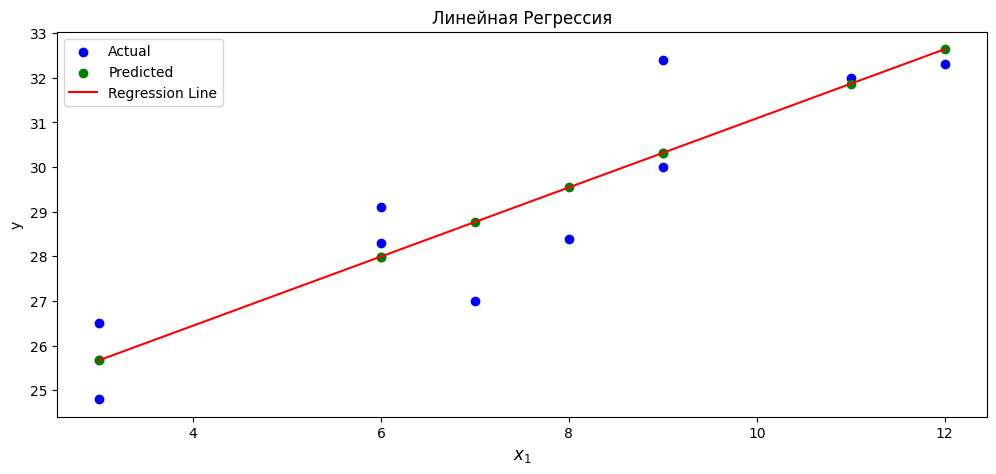

In [12]:
# Визуализация - Точки и линия регрессии
plt.figure(figsize=(12, 5))
plt.scatter(df['x1'], df['y'], color='blue', label='Actual')
plt.scatter(df['x1'], df_results['Predicted'], color='green', label='Predicted')
plt.plot(df['x1'], y_pred, color='red', label='Regression Line')

plt.title('Линейная Регрессия')
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('y')
plt.legend()
plt.show()

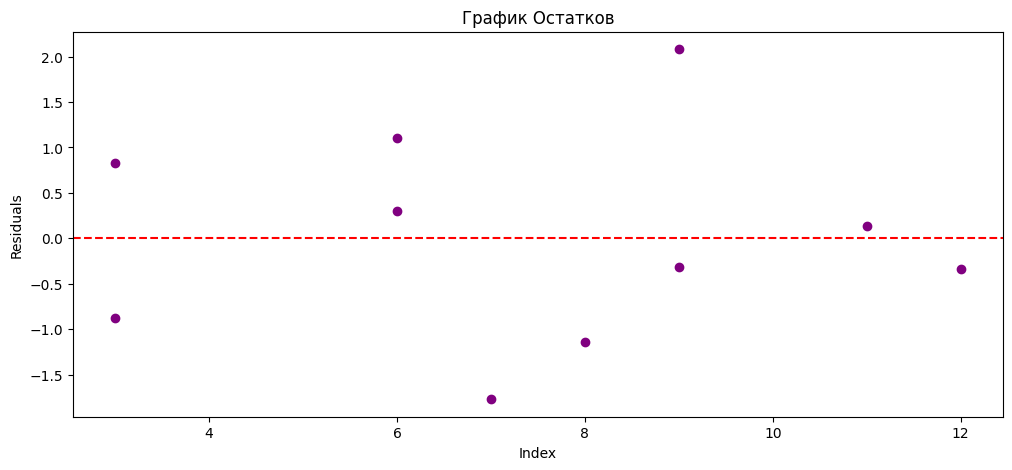

In [13]:
# График остатков
plt.figure(figsize=(12, 5))
# residuals = y_pred - df['y']
residuals = df['y'] - y_pred
plt.scatter(df['x1'], residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('График Остатков')
plt.show()

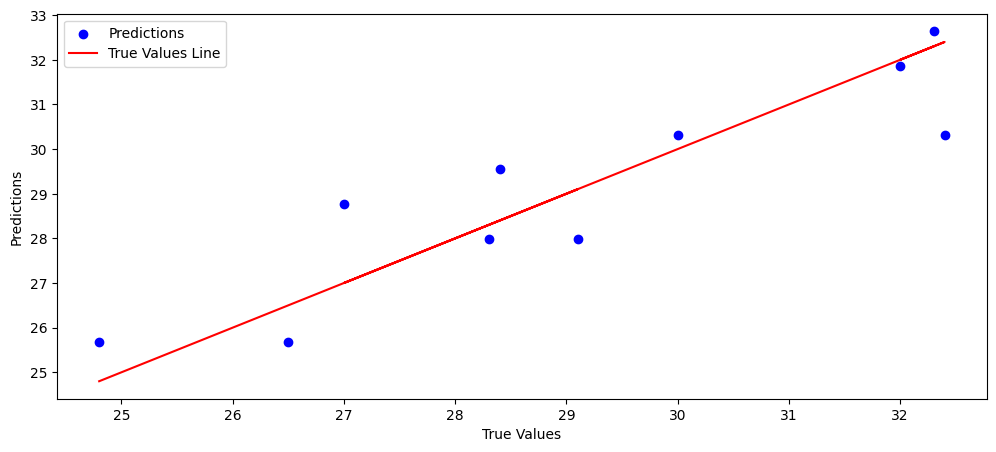

In [14]:
# График предсказаний против истинных значений
plt.figure(figsize=(12, 5))

plt.scatter(df['y'], df_results['Predicted'], color='blue', label='Predictions')
plt.plot(df['y'], df['y'], color='red', label='True Values Line')

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

Модель не идеальна, но улавливает общий тренд (точки примерно следуют направлению линии)

### Вывод по первой части

В ходе первой части лабораторной работы была построена модель линейной регрессии на одном признаке, получены предсказания, высчитаны метрики. Значение коэффициента детерминации - удовлетворительное.

Был построен график регрессии и график остатков.

# Часть 2: Полиномиальная регрессия

In [15]:
# Данные
# x = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1, 1)
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
# y = np.array([26.2, 44.3, 66.7, 72.5, 89.5, 97.5, 98.0])
y = np.array([26.2, 44.3, 66.7, 72.5, 89.5, 97.5, 98.0, 117.5, 97.2, 108.2])    

df2 = pd.DataFrame({'x': x.flatten(), 'y': y.flatten()})
df2

,x,y
0,0,26.2
1,1,44.3
2,2,66.7
3,3,72.5
4,4,89.5
5,5,97.5
6,6,98.0
7,7,117.5
8,8,97.2
9,9,108.2


### Полиномиальная регрессия степени 2

In [16]:
# ЧАСТЬ 2
from sklearn.preprocessing import PolynomialFeatures

# степень полиномиальной регрессии
DEGREE = 2

def get_poly_features(x: np.ndarray | pd.DataFrame, degree: int):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    return x_poly

# одни и те же значения хранятся в x и соотв. колонке df2:
# print(x)
# print(df2[['x']])

x_poly = get_poly_features(x, degree=DEGREE)
x_poly

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.],
       [ 1.,  7., 49.],
       [ 1.,  8., 64.],
       [ 1.,  9., 81.]])

- получены полиномиальные признаки для x

Применение линейной регрессии к полиномиальным признакам

In [17]:
model_poly = LinearRegression()
model_poly.fit(x_poly, y)

# Анализ коэффициентов модели
b = model_poly.intercept_
a = model_poly.coef_[0]

print(f'a (коэффициенты для полиномиальных признаков) = {a}')
print(f'b (свободный член) = {b}')

a (коэффициенты для полиномиальных признаков) = 0.0
b (свободный член) = 26.19727272727286


In [18]:
# Предсказание
y_pred_poly = model_poly.predict(x_poly)
y_pred_poly

array([ 26.19727273,  45.70212121,  62.52287879,  76.65954545,
        88.11212121,  96.88060606, 102.965     , 106.36530303,
       107.08151515, 105.11363636])

In [19]:
# Метрики качества
print('Степень 2:')
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred_poly))
print('R2 metric:', metrics.r2_score(y, y_pred_poly))

Степень 2:
Mean Absolute Error: 4.081636363636361
R2 metric: 0.961150137817278


Получено почти идеальное значение R2, скорее всего произошло переобучение

График полиномиальной регрессии степени 2

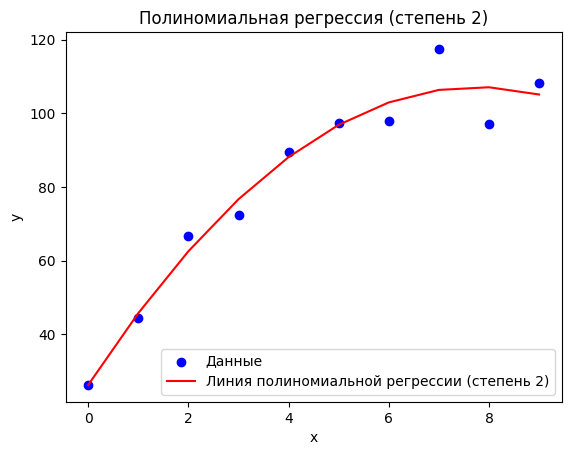

In [20]:
# Визуализация
plt.scatter(x, y, color='blue', label='Данные')
plt.plot(x, y_pred_poly, color='red', label='Линия полиномиальной регрессии (степень 2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Полиномиальная регрессия (степень {DEGREE})')
plt.show()

### Полиномиальная регрессия степени 3

In [21]:
x_poly_3 = get_poly_features(df2[['x']], degree=3)
x_poly_3

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.],
       [  1.,   7.,  49., 343.],
       [  1.,   8.,  64., 512.],
       [  1.,   9.,  81., 729.]])

In [22]:
model_poly_3 = LinearRegression()
model_poly_3.fit(x_poly_3, y)

LinearRegression()

In [23]:
# Анализ коэффициентов модели для степени 3
b_3 = model_poly_3.intercept_
a_3 = model_poly_3.coef_[0]

print(f'a (коэффициенты для полиномиальных признаков степени 3) = {a_3}')
print(f'b (свободный член) = {b_3}')

a (коэффициенты для полиномиальных признаков степени 3) = 0.0
b (свободный член) = 26.006853146853032


In [24]:
# Предсказание для степени 3
y_pred_poly_3 = model_poly_3.predict(x_poly_3)

# Метрики качества для степени 3
print('Degree 3:')
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['y'], y_pred_poly_3))
print('R2 metric:', metrics.r2_score(y, y_pred_poly_3))

Degree 3:
Mean Absolute Error: 4.081636363636392
R2 metric: 0.9611733775811582


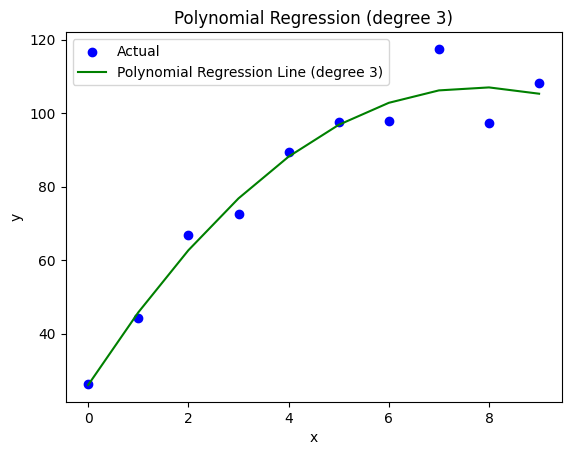

In [25]:
# Визуализация для степени 3
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred_poly_3, color='green', label='Polynomial Regression Line (degree 3)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression (degree 3)')
plt.show()

### Полиномиальная регрессия (степень 4)

In [26]:
x_poly_4 = get_poly_features(x, degree=4)
x_poly_4

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03]])

In [27]:
model_poly_4 = LinearRegression()
model_poly_4.fit(x_poly_4, y)

LinearRegression()

In [28]:
# Анализ коэффициентов модели для степени 4
b_4 = model_poly_4.intercept_
a_4 = model_poly_4.coef_[0]
print(f'a (коэффициенты для полиномиальных признаков степени 4) = {a_4}')
print(f'b (свободный член) = {b_4}')

a (коэффициенты для полиномиальных признаков степени 4) = 0.0
b (свободный член) = 26.336013986013413


In [29]:
def get_predictions_and_metrics(
    model_poly_n: LinearRegression,
    x_poly_n_values: np.ndarray,
    y_values: np.ndarray,
    degree: int
) -> tuple[np.ndarray, float, float]:
    # Предсказание для степени n
    y_pred = model_poly_n.predict(x_poly_n_values)
    mae = metrics.mean_absolute_error(y_values, y_pred)
    r2_metric = metrics.r2_score(y_values, y_pred)
    
    # Метрики качества для степени n
    print(f'Степень {degree}:')
    print('(MAE) Mean Absolute Error:', mae)
    print('R2 metric:', r2_metric)
    
    return y_pred, mae, r2_metric

y_pred_poly_4, mae_poly_4, r2_poly_4 = get_predictions_and_metrics(
    model_poly_4,
    x_poly_4,
    y_values=y,
    degree=4
)

Степень 4:
(MAE) Mean Absolute Error: 3.9698601398595557
R2 metric: 0.9612994027073678


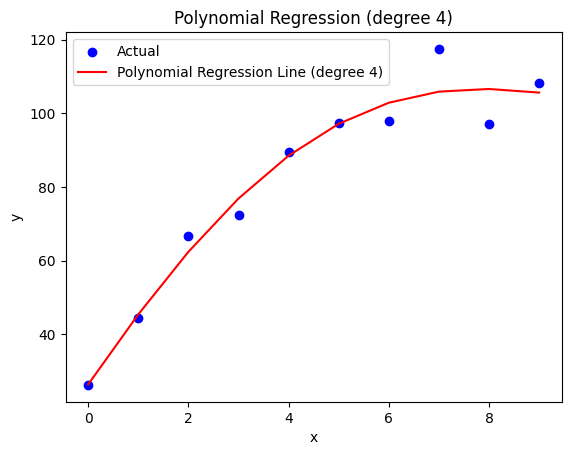

In [30]:
DEGREE = 4
# Визуализация для степени 4
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred_poly_4, color='red', label=f'Polynomial Regression Line (degree {DEGREE})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Polynomial Regression (degree {DEGREE})')
plt.show()

In [31]:
def calculate_poly_features(x: np.ndarray, degree: int) -> np.ndarray:
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x)
    return x_poly


def get_predictions_and_metrics(
    model_poly_n: LinearRegression,
    x_poly_n_values: np.ndarray,
    y_values: np.ndarray,
    degree: int,
) -> tuple[np.ndarray, float, float]:
    # Предсказание для степени n
    y_predictions = model_poly_n.predict(x_poly_n_values)
    mae = metrics.mean_absolute_error(y_values, y_predictions)
    r2_metric = metrics.r2_score(y_values, y_predictions)

    # Метрики качества для степени n
    print(f"Степень {degree}:")
    print("(MAE) Mean Absolute Error:", mae)
    print("R2 метрика:", r2_metric)
    return y_predictions, mae, r2_metric


def calculate_regression(
    x: np.ndarray,
    y: np.ndarray,
    degree: int
) -> dict:
    x_poly = calculate_poly_features(x, degree=degree)
    x_poly

    model_poly = LinearRegression()
    model_poly.fit(x_poly, y)

    # Анализ коэффициентов модели
    b = model_poly.intercept_
    a = model_poly.coef_[0]

    print(f"a (коэффициенты для полиномиальных признаков) = {a}")
    print(f"b (свободный член) = {b}")

    y_predicted_poly, mae, r2_metric = get_predictions_and_metrics(
        model_poly,
        x_poly,
        y_values=y,
        degree=degree
    )

    return {
        "polynomial features": x_poly,
        "a": a,
        "b": b,
        "y (predicted)": y_predicted_poly,
        "MAE": mae,
        "R2": r2_metric,
    }

DEGREE = 9

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([26.2, 44.3, 66.7, 72.5, 89.5, 97.5, 98.0, 117.5, 97.2, 108.2])    

regression_res = calculate_regression(x, y, DEGREE)
y_pred = regression_res["y (predicted)"]

df = pd.DataFrame({
    "x": x.flatten(),
    "y": y.flatten(),
    "y_pred": y_pred 
})
df

a (коэффициенты для полиномиальных признаков) = 0.0
b (свободный член) = 26.200001006645635
Степень 9:
(MAE) Mean Absolute Error: 7.157129662260786e-07
R2 метрика: 0.999999999999998


,x,y,y_pred
0,0,26.2,26.200001
1,1,44.3,44.300000
2,2,66.7,66.700001
3,3,72.5,72.500000
4,4,89.5,89.500000
5,5,97.5,97.500000
6,6,98.0,98.000000
7,7,117.5,117.500000
8,8,97.2,97.200001
9,9,108.2,108.199996


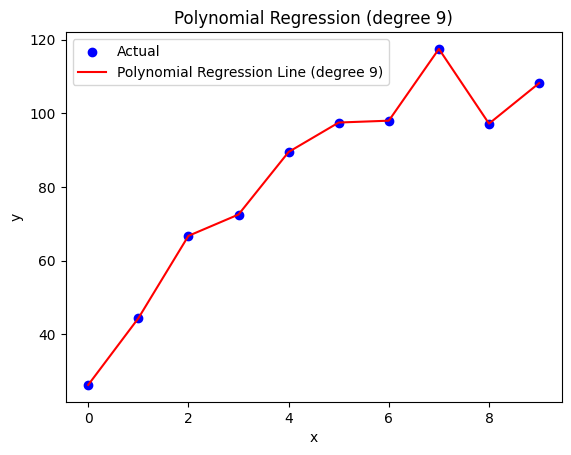

In [32]:
# Визуализация для степени 4
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label=f'Polynomial Regression Line (degree {DEGREE})')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(f'Polynomial Regression (degree {DEGREE})')
plt.show()

На графике переобучение становится более явным, прямая регрессия пересекает все реальные значения. По изгибам кривой видно, как модель подстроилась под данные.

### Вывод по второй части

Во второй части работы были смоделированы полиномиальные признаки второй, третьей и четвертой степени.

На этих признаках были построены модели линейной регрессии (3 модели, каждая модель соответствующая полученным признакам каждой из степеней), которые показали, что полиномиальные признаки вызывают переобучение моделей. Чем больше полиномиальных признаков, тем сильнее переобучение.

In [33]:
car_data = pd.read_csv(
    "https://raw.githubusercontent.com/m0rphed/suai-data-analysis-intro/refs/heads/lab03/data/datasets_03/carprice.csv"
)

car_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


| Название столбца | Описание                                                                                                                       |
|------------------|--------------------------------------------------------------------------------------------------------------------------------|
| Car_ID           | Уникальный идентификатор каждого наблюдения (целое число)                                                                      |
| Symboling        | Присвоенный рейтинг страхового риска: <br> -3 — автомобиль является рискованным, <br> -3 — довольно безопасен (категориальный) |
| carCompany       | Название автомобильной компании                                                                                                |
| fueltype         | Тип топлива автомобиля                                                                                                         |
| aspiration       | Аспирация, используемая в автомобиле                                                                                           |
| doornumber       | Количество дверей в автомобиле                                                                                                 |
| carbody          | Кузов автомобиля                                                                                                               |
| drivewheel       | Тип ведущего колеса                                                                                                            |
| enginelocation   | Расположение двигателя автомобиля                                                                                              |
| wheelbase        | Колесная база автомобиля                                                                                                       |
| carlength        | Длина машины                                                                                                                   |
| carwidth         | Ширина машины                                                                                                                  |
| carheight        | Высота машины                                                                                                                  |
| curbweight       | Вес автомобиля без пассажиров и багажа                                                                                         |
| enginetype       | Тип двигателя                                                                                                                  |
| cylindernumber   | Количество цилиндров в автомобиле                                                                                              |
| enginesize       | Размер двигателя                                                                                                               |
| fuelsystem       | Топливная система автомобиля                                                                                                   |
| boreratio        | Коэффициент расточки двигателя                                                                                                 |
| stroke           | Ход поршня или объем внутри двигателя (числовой)                                                                               |
| compressionratio | Степень сжатия внутри двигателя                                                                                                |
| horsepower       | Мощность в лошадиных силах                                                                                                     |
| peakrpm          | Пиковые обороты автомобиля                                                                                                     |
| citympg          | Пробег по городу                                                                                                               |
| highwaympg       | Пробег по шоссе                                                                                                                |
| price            | Цена автомобиля                                                                                                                |


### Предметная область:

Данная таблица представляет собой набор данных о характеристиках автомобилей. Она включает информацию о различных параметрах автомобиля, таких как размер, тип двигателя, параметры безопасности и топливной эффективности.

Этот набор данных может использоваться для анализа цен на автомобили, что позволяет предсказывать цену на основе других характеристик.

### Целевая переменная

Выбираем целевую переменную регрессии:

`price` — цена автомобиля, которая будет предсказываться на основе других характеристик.

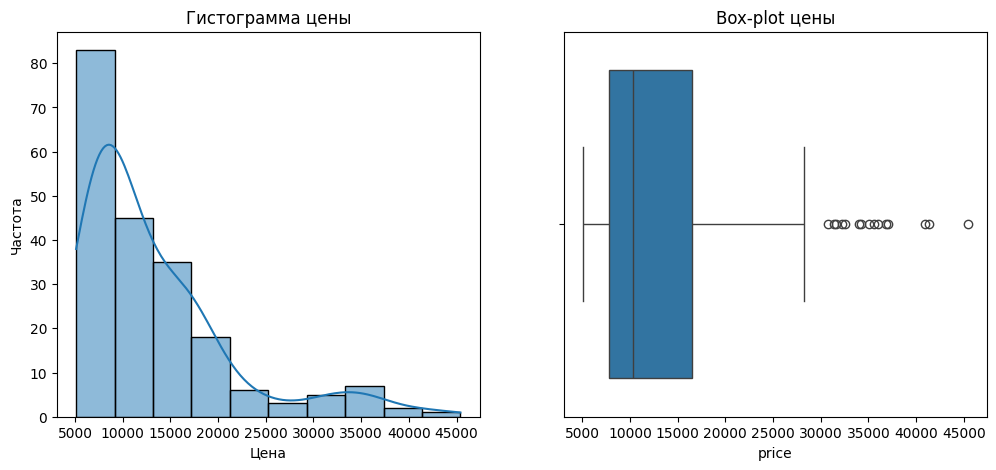

In [34]:
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(car_data['price'], bins=10, kde=True)
plt.title('Гистограмма цены')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=car_data['price'])
plt.title('Box-plot цены')
plt.show()

Из гистограммы видно, что распределение напоминает логнормальное, т.к. имеет большой хвост справа.

Это подтвержается ящиком с усами, хвост на нем отображается как отдельные точки. Это свидетельствует о выбросах - их стоит удалить, чтобы эти значения не влияли на дальнейшую регрессию которою предстоит построить.

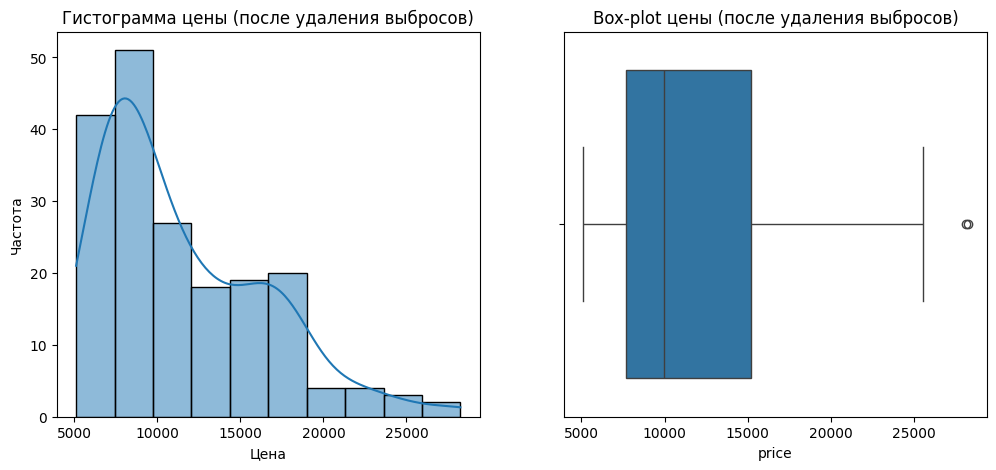

In [35]:
# Удаление выбросов
q1 = car_data['price'].quantile(0.25)
q3 = car_data['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

car_data_cleaned = car_data[(car_data['price'] >= lower_bound) & (car_data['price'] <= upper_bound)]

# Визуализация распределения цен после удаления выбросов
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(car_data_cleaned['price'], bins=10, kde=True)
plt.title('Гистограмма цены (после удаления выбросов)')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=car_data_cleaned['price'])
plt.title('Box-plot цены (после удаления выбросов)')
plt.show()


In [36]:
car_data = car_data_cleaned

In [37]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

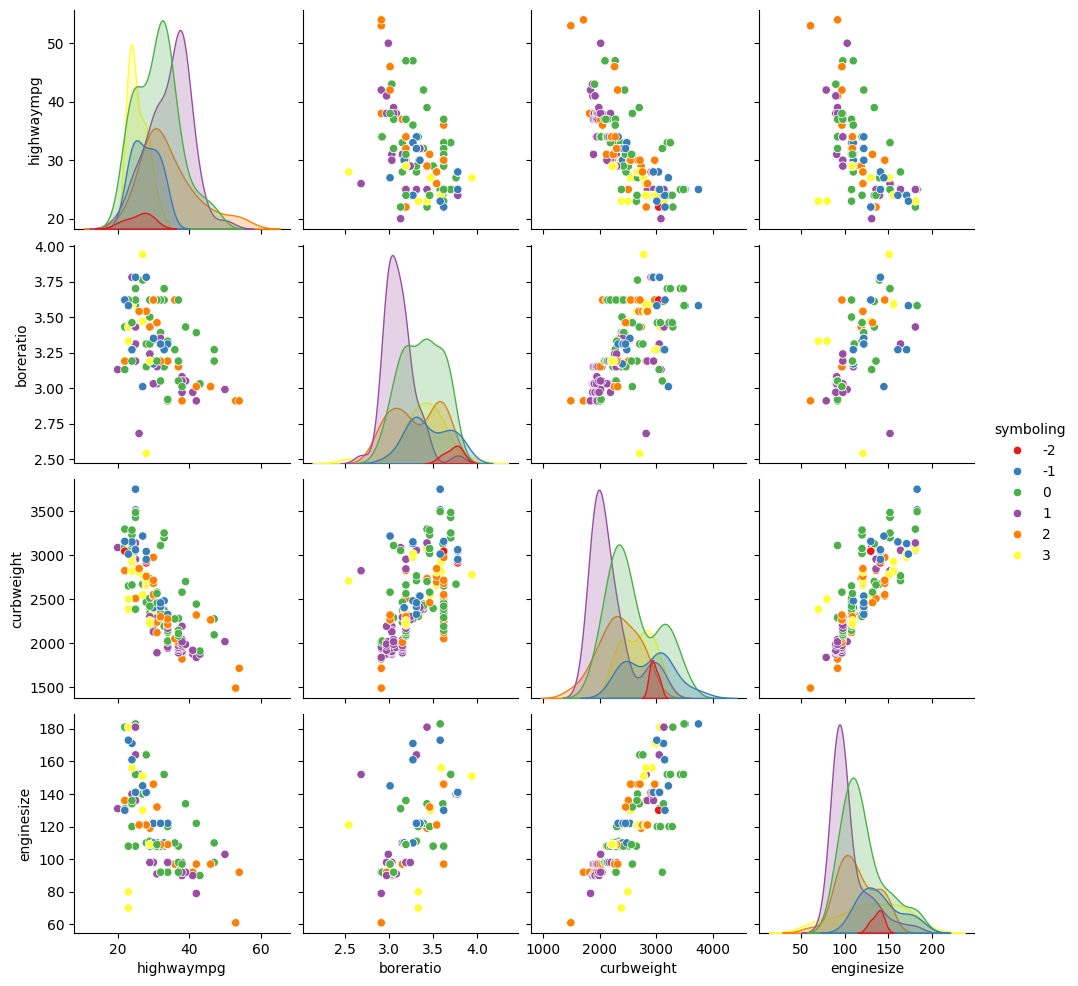

In [38]:
sns.pairplot(car_data[[
    "highwaympg",
    "boreratio",
    "curbweight",
    "enginesize",
    "symboling"
]],
    hue="symboling",
    diag_kind="kde",
    palette="Set1"
)

1. **highwaympg (diagonal):**
   Мультимодальное распределение с несколькими пиками. Пики имеют положительное значение риска

2. **boreratio vs highwaympg:**
   Слабая отрицательная корреляция. При увеличении highway mpg коэффициент расточки двигателя имеет тенденцию к уменьшению.

3. **curbweight vs highwaympg:**
   Сильная отрицательная корреляция. Чем тяжелее автомобиль, тем меньше экономичность на шоссе.

4. **enginesize vs highwaympg:**
   Сильная отрицательная корреляция. Большие двигатели показывают худшую экономичность.

5. **boreratio (diagonal):**
   Мультимодальное распределение с двумя основными пиками - риск 0 и 1

6. **curbweight vs boreratio:**
   Слабая положительная корреляция. Более тяжелые автомобили имеют тенденцию к большему коэффициенту расточки.

7. **enginesize vs boreratio:**
   Слабая положительная корреляция. Большие двигатели имеют тенденцию к большему коэффициенту расточки.

8. **curbweight (diagonal):**
   Правосмещенное распределение с несколькими пиками.

9. **enginesize vs curbweight:**
   Сильная положительная корреляция. Больший размер двигателя соответствует большему весу автомобиля.

10. **enginesize (diagonal):** Правосмещенное распределение.

Зависимости от symboling (рейтинга риска):
- Более экономичные автомобили (высокий highway mpg) имеют положительные риски, но чем больше риск, тем опаснее
- Более тяжелые автомобили и с большими двигателями чаще имеют более рискованные рейтинги


In [39]:
### разбиение и нормализация данных

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cat_columns = [
    x for x in car_data.columns
    if car_data[x].dtype == 'object'
]

data = car_data.drop(
    columns=cat_columns + ['car_ID']
)

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {len(X_train) / len(data) * 100}%")
print(f"Test: {len(X_test) / len(data) * 100}%")

Train: 80.0%
Test: 20.0%


In [40]:
# Данные разбились ровно на 80% и 20%

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> Нормализация данных была проведена с помощью StandardScaler

### Линейная регрессия (автомобили)

Был создан дата-фрейм с метриками для моделей.

In [41]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse},\nMAE: {mae},\nRMSE: {rmse},\nR2: {r2}')

MSE: 4053348.7100273552,
MAE: 1650.7708623519127,
RMSE: 2013.2930015343904,
R2: 0.7588661092603698


In [ ]:
car_prices_prediction_metrics = pd.DataFrame(
    columns=["MSE", "MAE", "RMSE", "R2"]
)
car_prices_prediction_metrics.loc["Linear Regression"] = [
    mse,
    mae,
    rmse,
    r2
]

car_prices_prediction_metrics

,MSE,MAE,RMSE,R2
Linear Regression,4.053349e+06,1650.770862,2013.293002,0.758866


Была получена линейная регрессия с (относительно) не очень высоким показателем коэффициента детерминации (0.75)

In [43]:
type(y_test)
y_test: pd.Series = y_test

In [44]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
}).reset_index(drop=True)

results.head(10)

,Actual,Predicted
0,9980.000,8953.483483
1,13415.000,15000.262989
2,7609.000,7383.406494
3,5389.000,6291.977162
4,16900.000,18557.447474
5,5151.000,251.379346
6,17859.167,18594.940020
7,6295.000,6140.372507
8,6938.000,7763.694170
9,7053.000,8608.354288


> Был создан датафрейм с истинными и предсказанными значениями

- Датафрейм с коэффициентами важности признаков:

In [45]:
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coeffs = coeffs.sort_values(
    by="Coefficient",
    ascending=False
)

coeffs

,Feature,Coefficient
13,highwaympg,1557.064096
5,curbweight,1423.898781
10,horsepower,1296.602179
3,carwidth,1283.840528
9,compressionratio,1268.816655
1,wheelbase,1084.364681
6,enginesize,887.702717
11,peakrpm,241.162560
0,symboling,89.998829
4,carheight,-55.246424


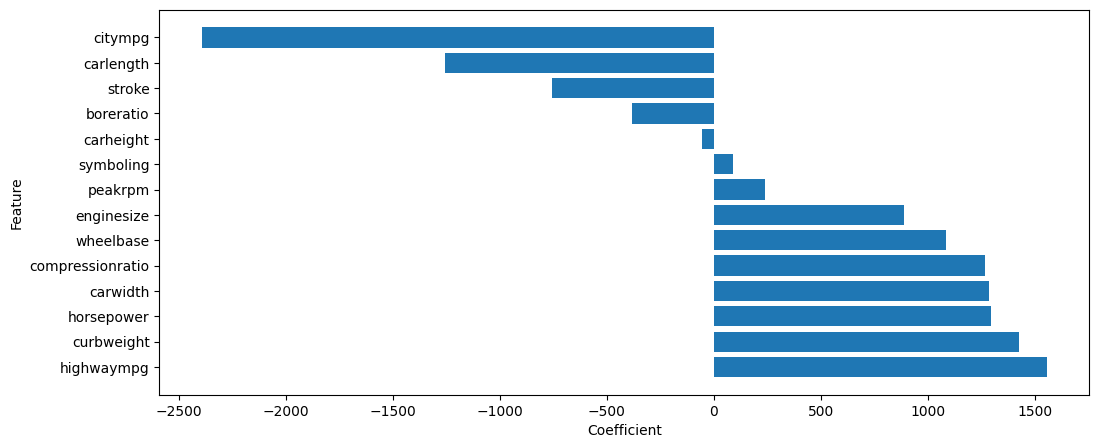

In [46]:
plt.figure(figsize=(12, 5))
plt.barh(coeffs["Feature"], coeffs["Coefficient"])
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.show()

Наиболее влиятельные признаки (положительная корреляция):
- enginesize (размер двигателя) - самое сильное положительное влияние
- highwaympg (расход топлива на шоссе)
- compressionratio (степень сжатия)
- peakrpm (максимальные обороты)
- carwidth (ширина автомобиля)
  
Наиболее влиятельные признаки (отрицательная корреляция):
- citympg (расход топлива в городе)
- stroke (ход поршня)
- carlength (длина автомобиля)

Признаки с наименьшим влиянием:
- symboling (рейтинг риска) - это подозрительно, скорее всего признак стоило расценивать как категориальный
- curbweight (вес автомобиля)
- boreratio (коэффициент расточки)

Визуализация фактических и предсказанных значений

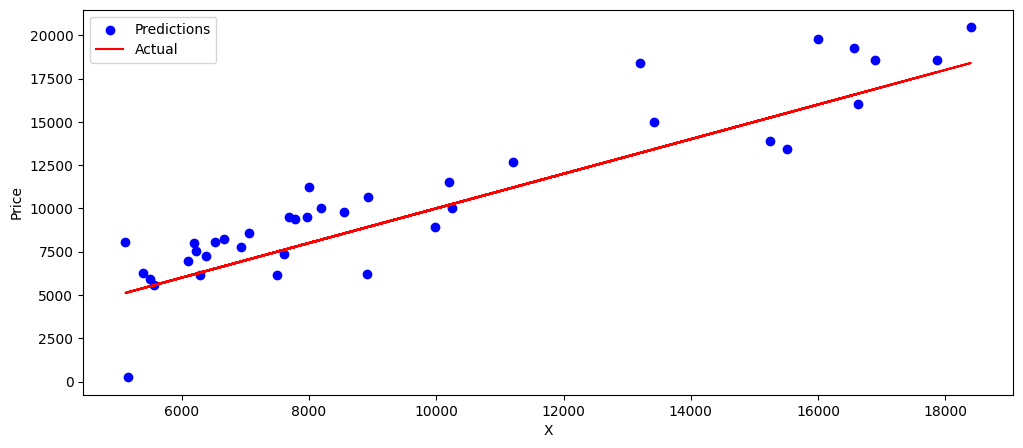

In [47]:
plt.figure(figsize=(12, 5))

plt.scatter(
    results['Actual'],
    results['Predicted'],
    color='blue',
    label='Predictions'
)

plt.plot(
    results['Actual'],
    results['Actual'],
    color='red',
    label='Actual'
)

plt.xlabel('X')
plt.ylabel('Price')
plt.legend()
plt.show()

В целом модель демонстрирует хорошую предсказательную способность с небольшой тенденцией к ошибкам на экстремальных значениях.

### kNN (Метод k-ближайших соседей)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse},\nMAE: {mae},\nRMSE: {rmse},\nR2: {r2}')
car_prices_prediction_metrics.loc['KNN (k=5)'] = [mse, mae, rmse, r2]

results_knn = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

MSE: 3670067.8253339194,
MAE: 1325.1254473684212,
RMSE: 1915.7421082530705,
R2: 0.7816675057312972


- Была построена модель k-ближайших соседей, высчитаны метрики.
- Был создан датасет с предсказаниями и истинными значениями.
- Коэффициент детерминации у этой модели лучше

### Decision Tree (Дерево решений)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse},\nMAE: {mae},\nRMSE: {rmse},\nR2: {r2}')

car_prices_prediction_metrics.loc['Decision Tree'] = [
    mse,
    mae,
    rmse,
    r2
]

results_tree = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

MSE: 3176135.137312868,
MAE: 1226.8245526315789,
RMSE: 1782.1714668664372,
R2: 0.8110515827862408


- Была построена модель дерева решений, посчитаны метрики.
- Был создан датасет с предсказаниями и истинными значениями.
- Коэффициент детерминации (R2) у этой модели получился лучший: `0.81`. Это очень хороший показатель.

### Сравнение моделей

Для сравнения моделей был построен график предсказаний каждой из них.

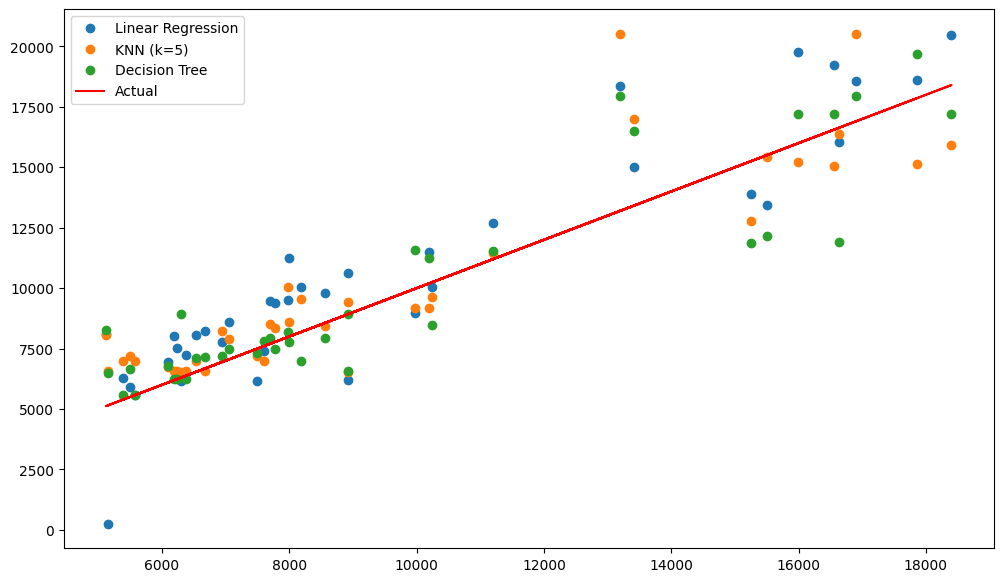

In [52]:
plt.figure(figsize=(12, 7))
plt.plot(results['Actual'], results['Predicted'], 'o', label='Linear Regression')
plt.plot(results_knn['Actual'], results_knn['Predicted'], 'o', label='KNN (k=5)')
plt.plot(results_tree['Actual'], results_tree['Predicted'], 'o', label='Decision Tree')

plt.plot(results['Actual'], results['Actual'], color='red', label='Actual')
plt.legend()

plt.show()

1. Линейная регрессия (синие точки):
   - Имеет несколько серьезных выбросов в низком сегменте
   - Занижает предсказания в высоком ценовом сегменте
   - Показывает стабильный линейный тренд
   - Отображает предсказания, которые стремятся к прямой зависимости от реальных значений. Линия регрессии является простой линейной зависимостью, и она лучше работает, когда данные имеют линейную тенденцию.

2. KNN (k=5) (оранжевые точки):
   - Недооценивает стоимость в высоком ценовом сегменте
   - Более стабильные предсказания в низком и среднем сегменте
   - KNN работает путем определения ближайших соседей для каждого тестового примера и оценки значения на основе этих соседей. Для k=5 KNN, видимо, имеет более высокую гибкость, но это может приводить к большим колебаниям, когда данные непоследовательны.
   - На графике оранжевые точки имеют больше разброса по отношению к реальной линии (Actual), что указывает на то, что KNN может страдать от повышенной чувствительности к локальным данным. Это может быть как преимуществом (более точное моделирование локальных особенностей), так и недостатком (чувствительность к шуму)

3. Decision Tree (зеленые точки):
   - Переоценивает стоимость в высоком ценовом сегменте
   - На графике видны зеленые точки, которые несколько лучше согласуются с фактическими значениями, чем KNN, но при этом также имеют разброс. Видно, что в некоторых случаях дерево решений приближается ближе к реальным значениям (Actual), чем линейная регрессия, что может указывать на то, что модель более гибкая и лучше улавливает нелинейные зависимости.

### Общие выводы по сравнению моделей

На основании графика, для модели, которая лучше всего описывает реальную зависимость между признаками и ценами автомобилей, можно сделать следующие выводы:

- Линейная регрессия подходит для случаев, где требуется простота и объяснимость модели.

- Дерево решений может лучше подстраиваться к данным, но его предсказания могут быть менее стабильными.

- KNN имеет некоторую гибкость, но результаты сильно зависят от распределения соседних данных и значения k.

In [ ]:
car_prices_prediction_metrics

,MSE,MAE,RMSE,R2
Linear Regression,4.053349e+06,1650.770862,2013.293002,0.758866
KNN (k=5),3.670068e+06,1325.125447,1915.742108,0.781668
Decision Tree,3.176135e+06,1226.824553,1782.171467,0.811052


### Вывод по третьей части

Наиболее хорошей по критерию детерминации является дерево решений, на втором месте - метод k-ближайших соседей, на третьем - линейная регрессия.

## Вывод

В ходе первой части лабораторной работы была построена модель линейной регрессии на одном признаке, получены предсказания, высчитаны метрики. Значение коэффициента детерминации - удовлетворительное. Для этой модели были построены графики регрессии и график остатков.

В ходе второй части работы были смоделированы полиномиальные признаки второй степени, третьей степени, четвертой степени, и наконец девятой степени (пока коэффициент детерминации не стал близок к 1).

На этих признаках было построено две модели линейной регрессии, которые показали, что полиномиальные признаки вызывают переобучение моделей. Чем больше полиномиальных признаков, тем сильнее переобучение.

В ходе третьей части работы были построены три различным регрессионные модели - Linear Regression, kNN, Decision Tree.

Данные предварительно были разбиты на тренировочную и тестовую выборку, они были нормализованы, выбросы (по целевому признаку) были удалены. Наиболее хорошей по критерию детерминации является дерево решений, на втором месте - метод k-ближайших соседей, на третьем - линейная регрессия.